In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bc=pd.read_csv('Churn_Modelling.csv')

In [3]:
bc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bc.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
bc.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [7]:
bc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


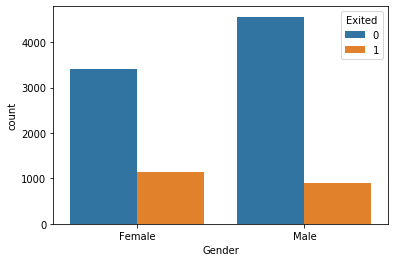

In [8]:
sns.countplot(data=bc,x='Gender',hue='Exited')

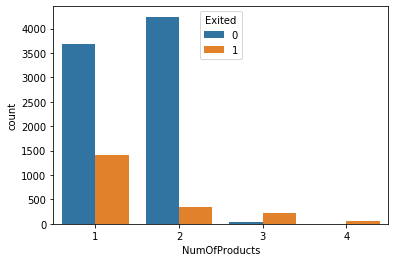

In [9]:
sns.countplot(data=bc,x='NumOfProducts',hue='Exited')

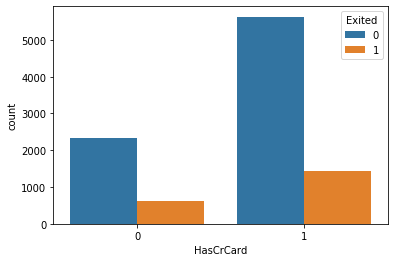

In [10]:
sns.countplot(x = "HasCrCard", hue="Exited", data = bc)

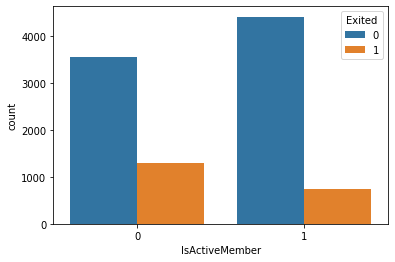

In [11]:
sns.countplot(x = "IsActiveMember", hue="Exited", data = bc)

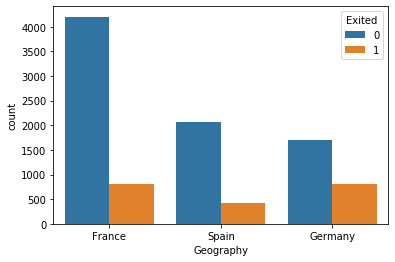

In [12]:
sns.countplot(x = "Geography", hue="Exited", data = bc)

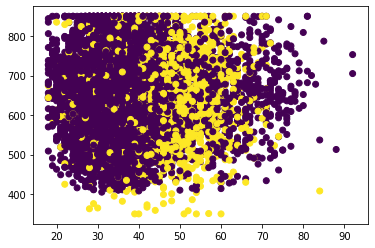

In [13]:
plt.scatter(data=bc,x='Age',y='CreditScore',c='Exited')
#people with low credit score have high chances to churn

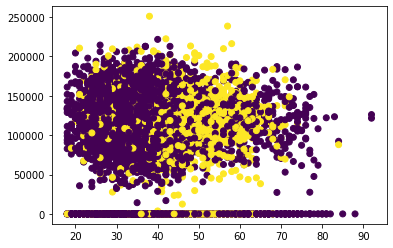

In [14]:
plt.scatter(data=bc,x='Age',y='Balance',c='Exited')
#Older people have higher chances to churn

In [15]:
gender=pd.get_dummies(bc['Gender'],drop_first=True)
geography=pd.get_dummies(bc['Geography'],drop_first=True)
tenure=pd.get_dummies(bc['Tenure'],drop_first=True)


In [16]:
new_df=pd.concat([bc,gender,geography,tenure],axis=1)

In [17]:
new_df.drop(['Geography','Gender','Tenure'],axis=1,inplace=True)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Male               10000 non-null uint8
Germany            10000 non-null uint8
Spain              10000 non-null uint8
1                  10000 non-null uint8
2                  10000 non-null uint8
3                  10000 non-null uint8
4                  10000 non-null uint8
5                  10000 non-null uint8
6                  10000 non-null uint8
7                  10000 non-null uint8
8                  10000 non-null uint8
9                  10000 non-null uint8
10                 10000 non-null uint8
dtypes: float64(2), int64(6), uint8(13)
memory u

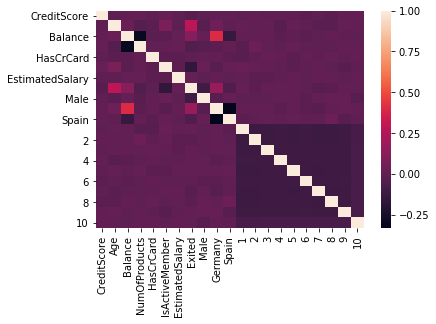

In [19]:
sns.heatmap(new_df.corr())

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=new_df.drop('Exited',axis=1)
y=new_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression 

In [23]:
logmodel=LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

C:\Users\AnishB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred_log=logmodel.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))
print('accuracy score:',accuracy_score(pred_log,y_test))

[[2364   40]
 [ 568   28]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2404
           1       0.41      0.05      0.08       596

    accuracy                           0.80      3000
   macro avg       0.61      0.52      0.49      3000
weighted avg       0.73      0.80      0.73      3000

accuracy score: 0.7973333333333333


In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
d=DecisionTreeClassifier()

In [30]:
d.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
pred_d=d.predict(X_test)

In [32]:
print(confusion_matrix(y_test,pred_d))
print(classification_report(y_test,pred_d))
print('accuracy score:',accuracy_score(y_test,pred_d))

[[2075  329]
 [ 287  309]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2404
           1       0.48      0.52      0.50       596

    accuracy                           0.79      3000
   macro avg       0.68      0.69      0.69      3000
weighted avg       0.80      0.79      0.80      3000

accuracy score: 0.7946666666666666


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc=RandomForestClassifier(n_estimators=500)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
pred_rfc=rfc.predict(X_test)

In [37]:
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))
print('accuracy score:',accuracy_score(pred_rfc,y_test))

[[2324   80]
 [ 321  275]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2404
           1       0.77      0.46      0.58       596

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000

accuracy score: 0.8663333333333333


In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_gnb = gnb.predict(X_test)


In [40]:
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))
print('accuracy score:',accuracy_score(pred_gnb, y_test))

[[2323   81]
 [ 557   39]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2404
           1       0.33      0.07      0.11       596

    accuracy                           0.79      3000
   macro avg       0.57      0.52      0.49      3000
weighted avg       0.71      0.79      0.73      3000

accuracy score: 0.7873333333333333


In [41]:
from xgboost import XGBClassifier, plot_importance

In [42]:
xgb  = XGBClassifier()

xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)


In [43]:
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))
print('accuracy score:',accuracy_score(pred_xgb, y_test))

[[2324   80]
 [ 312  284]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2404
           1       0.78      0.48      0.59       596

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000

accuracy score: 0.8693333333333333
